In [1]:
import codigo
from codigo import utils
from codigo import model_LSTM
from codigo import model_utils

In [2]:
import pandas as pd
import numpy as np
pd.set_option('mode.chained_assignment',None)
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
with open('dataset/generado/dataset15min/array_Xtest.npy', 'rb') as f:
    array_Xtest = np.load(f)

In [5]:
len(array_Xtest)

200321

In [6]:
with open('dataset/generado/dataset15min/array_Ytest.npy', 'rb') as f:
    array_Ytest = np.load(f)

In [7]:
len(array_Ytest)

200321

In [4]:
model = keras.models.load_model('modelos/modeloGeneral_v3.h5')

In [9]:
from pickle import load
scalerHours = load(open('dataset/generado/scalerHours.scaler', 'rb'))
scalerMin = load(open('dataset/generado/scalerMin.scaler', 'rb'))
scalerGlucosa = load(open('dataset/generado/scalerGlucosa.scaler', 'rb'))
scalerPodId = load(open('dataset/generado/scalerPodId.scaler', 'rb'))
scalerLevelId = load(open('dataset/generado/scalerLevelId.scaler', 'rb'))

# Predicción de todo el conjunto de pruebas generales

In [10]:
len(array_Ytest)

200321

6261/6261 [==============================] - 38s 6ms/step


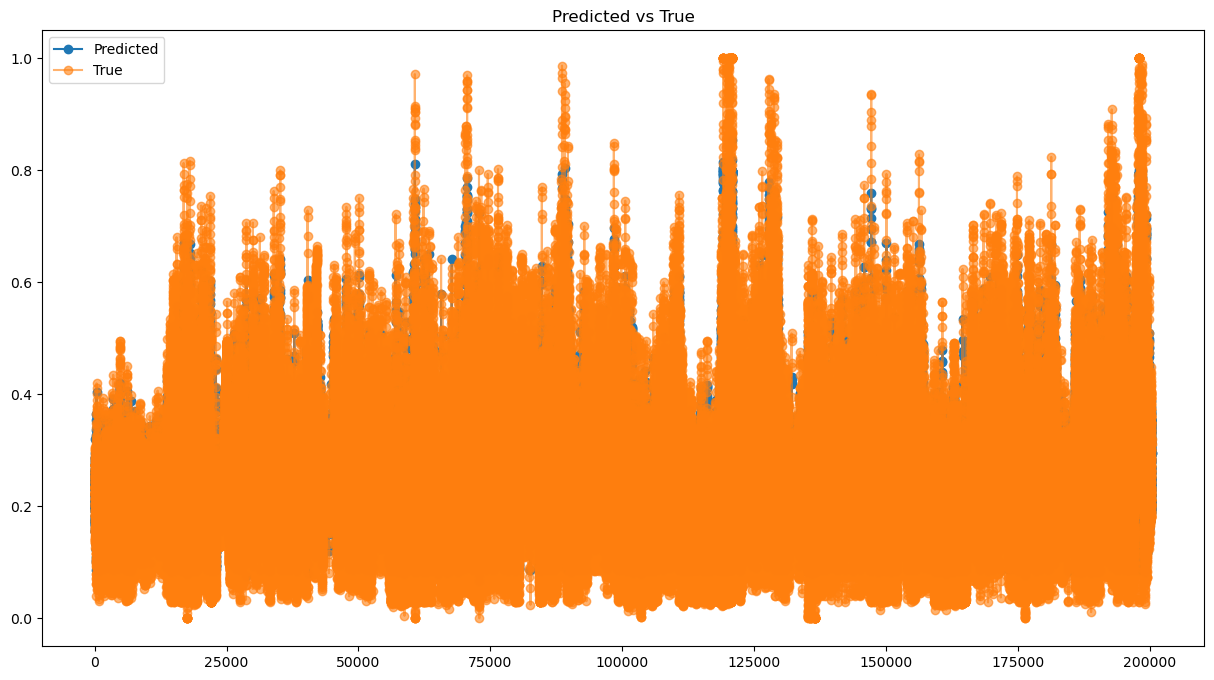

In [11]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [12]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.031538271889642575,
 'mse': 0.04170955669195186,
 'rmse': 0.001739687119439146}

# Predicción a 30 min del conjunto de pruebas generales

In [55]:
lenHorizonte=2
XTest=[]
YTest=[]
for i in range(lenHorizonte):
    XTest.append(array_Xtest[i]) 
    YTest.append(array_Ytest[i]) 
XTest=np.reshape(XTest, (lenHorizonte, array_Xtest.shape[1],array_Xtest.shape[2]))

df_YTest = pd.DataFrame(YTest, columns=['Glucose level True'])

YTest_scaled=scalerGlucosa.inverse_transform(YTest)
df_YTest_scaled = pd.DataFrame(YTest_scaled, columns=['Glucose level True']) 

In [56]:
yhat = model.predict(XTest)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest['Glucose level True']
df_glucose.head()

1/1 [==============================] - 0s 22ms/step


,Glucose level Predict,Glucose level True
0,0.246580,0.250000
1,0.249053,0.245652


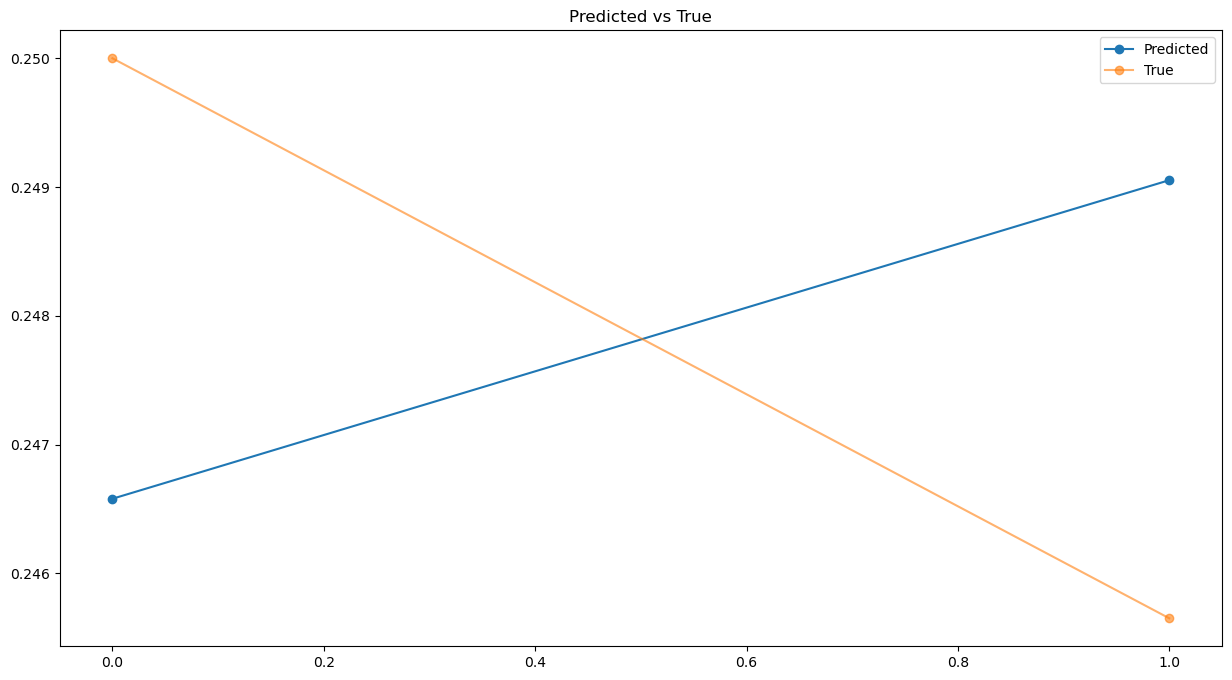

{'mae': 0.0034105604109556653,
 'mse': 0.0034105729711957754,
 'rmse': 1.1632007991851179e-05}

In [57]:
model_utils.plotPredicted(yhat,YTest)
model_utils.forecast_accuracy(yhat,YTest)

In [58]:
yhat_scaled=scalerGlucosa.inverse_transform(yhat)
df_glucose = pd.DataFrame(yhat_scaled, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest_scaled['Glucose level True']
df_glucose.head()

,Glucose level Predict,Glucose level True
0,153.426895,155.0
1,154.564606,153.0


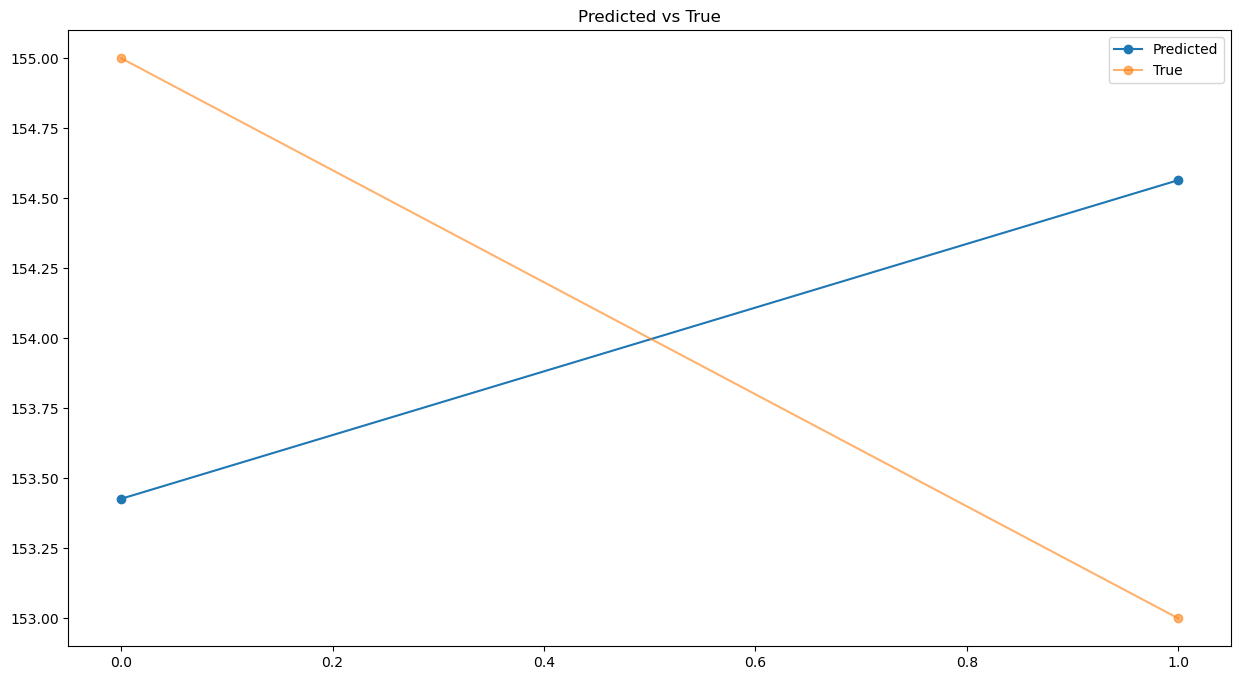

{'mae': 1.5688552856445312,
 'mse': 1.5688610410623927,
 'rmse': 2.4613249661633745}

In [59]:
model_utils.plotPredicted(yhat_scaled,YTest_scaled)
model_utils.forecast_accuracy(yhat_scaled,YTest_scaled)

# Predicción sobre predicción a 30 min del conjunto de pruebas generales

In [62]:
yhat=model_utils.predictionOverPrediction(XTest,model)
df_yhat = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_yhat.head()

df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest['Glucose level True']
df_glucose.head()

1/1 [==============================] - 0s 20ms/step


,Glucose level Predict,Glucose level True
0,0.246580,0.250000
1,0.245715,0.245652


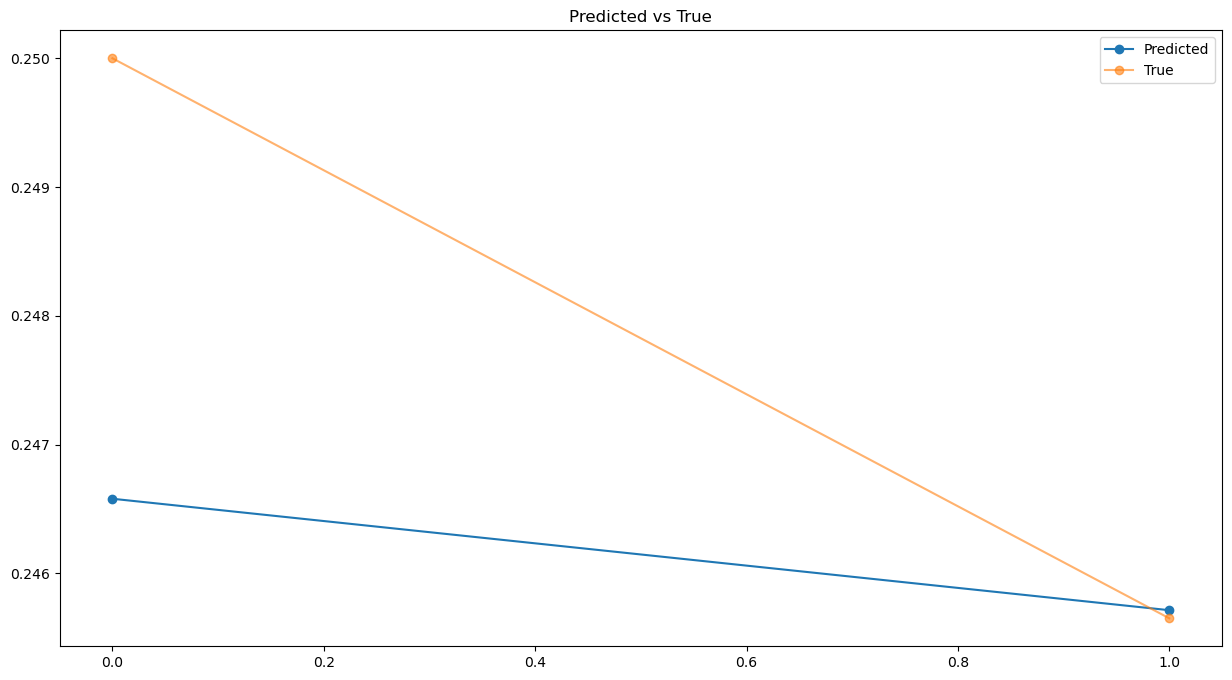

{'mae': 0.0017413025316984632,
 'mse': 0.0024185829794531595,
 'rmse': 5.849543628500523e-06}

In [63]:
model_utils.plotPredicted(yhat,YTest)
model_utils.forecast_accuracy(yhat,YTest)

In [64]:
yhat_scaled=scalerGlucosa.inverse_transform(df_yhat) 

df_glucose = pd.DataFrame(yhat_scaled, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest_scaled['Glucose level True']
df_glucose.head()

,Glucose level Predict,Glucose level True
0,153.426895,155.0
1,153.028885,153.0


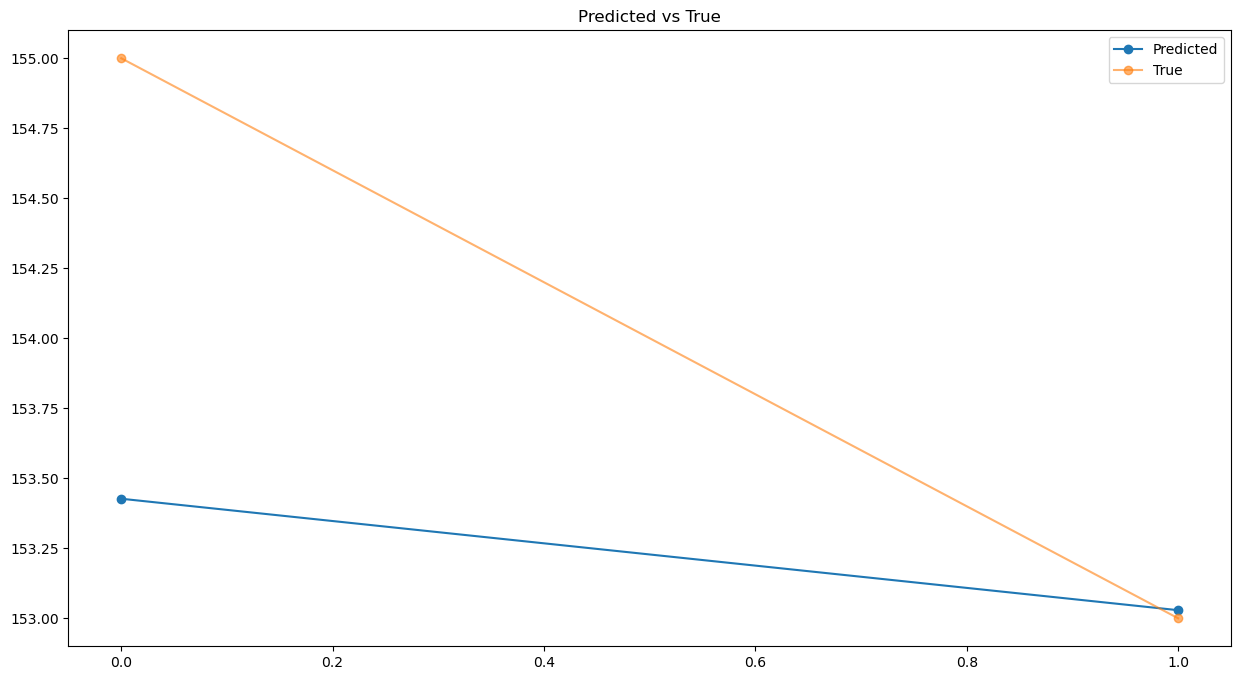

{'mae': 0.800994873046875,
 'mse': 1.1125406132483298,
 'rmse': 1.2377466161269695}

In [65]:
model_utils.plotPredicted(yhat_scaled,YTest_scaled)
model_utils.forecast_accuracy(yhat_scaled,YTest_scaled)

# Predicción del conjunto eventos del paciente 1

In [118]:
with open('dataset/generado/paciente1/eventos_X.npy', 'rb') as f:
    X = np.load(f) 

In [119]:
with open('dataset/generado/paciente1/eventos_Y.npy', 'rb') as f:
    Y = np.load(f) 

In [120]:
len(X)

25

In [121]:
len(Y)

25

In [122]:
df_Y = pd.DataFrame(Y, columns=['Glucose level True'])

Y_scaled=scalerGlucosa.inverse_transform(Y)
df_Y_scaled = pd.DataFrame(Y_scaled, columns=['Glucose level True']) 

In [123]:
yhat = model.predict(X)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_Y['Glucose level True']
df_glucose.head()

1/1 [==============================] - 0s 31ms/step


,Glucose level Predict,Glucose level True
0,0.156671,0.130435
1,0.305936,0.328261
2,0.314760,0.345652
3,0.136843,0.086957
4,0.255173,0.245652


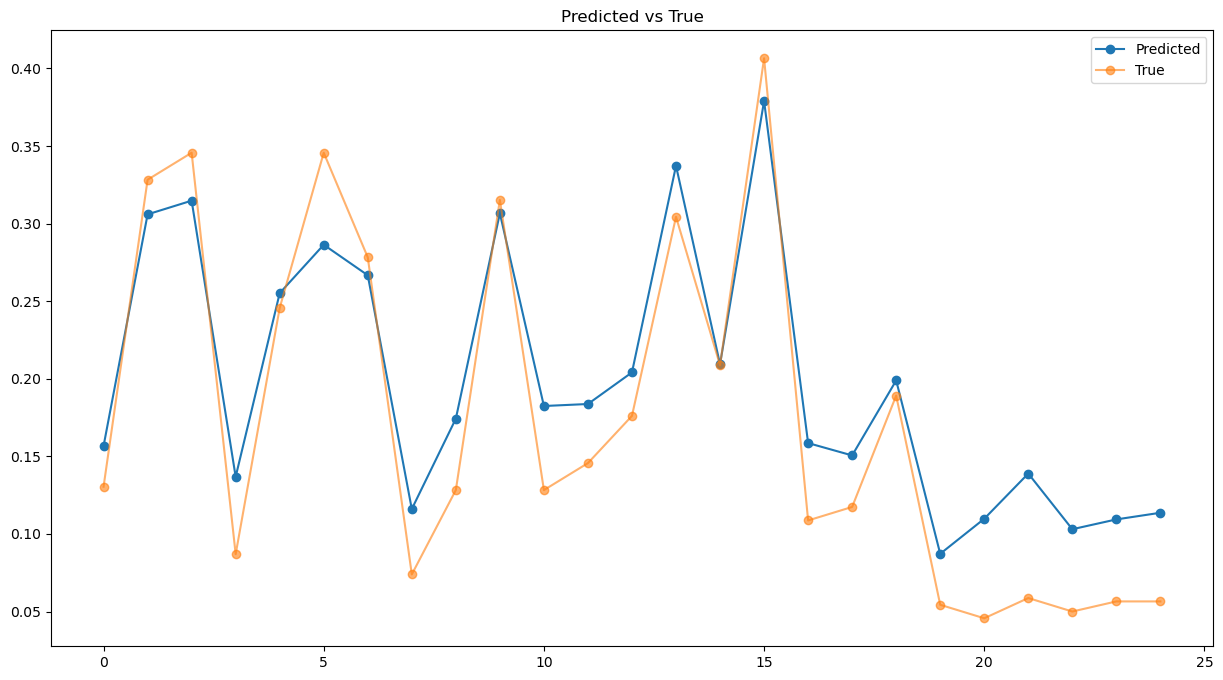

{'mae': 0.03683042363498521,
 'mse': 0.04172492492152485,
 'rmse': 0.0017409693597068856}

In [124]:
model_utils.plotPredicted(yhat,Y)
model_utils.forecast_accuracy(yhat,Y)

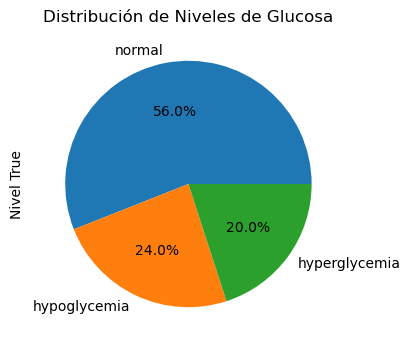

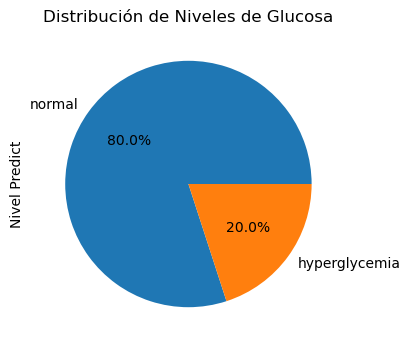

,Glucose level Predict,Nivel Predict,Glucose level True,Nivel True
0,112.068527,normal,100.0,normal
1,180.730698,hyperglycemia,191.0,hyperglycemia
2,184.789795,hyperglycemia,199.0,hyperglycemia
3,102.947701,normal,80.0,normal
4,157.379578,normal,153.0,normal


In [125]:
yhat_scaled=scalerGlucosa.inverse_transform(yhat)
df_glucose = pd.DataFrame(yhat_scaled, columns=['Glucose level Predict'])
df_glucose['Nivel Predict'] = df_glucose['Glucose level Predict'].apply(utils.label_LevelBG) 

df_glucose['Glucose level True']=df_Y_scaled['Glucose level True']
df_glucose['Nivel True'] = df_Y_scaled['Glucose level True'].apply(utils.label_LevelBG) 
df_glucose['Nivel True'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose['Nivel Predict'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose.head()


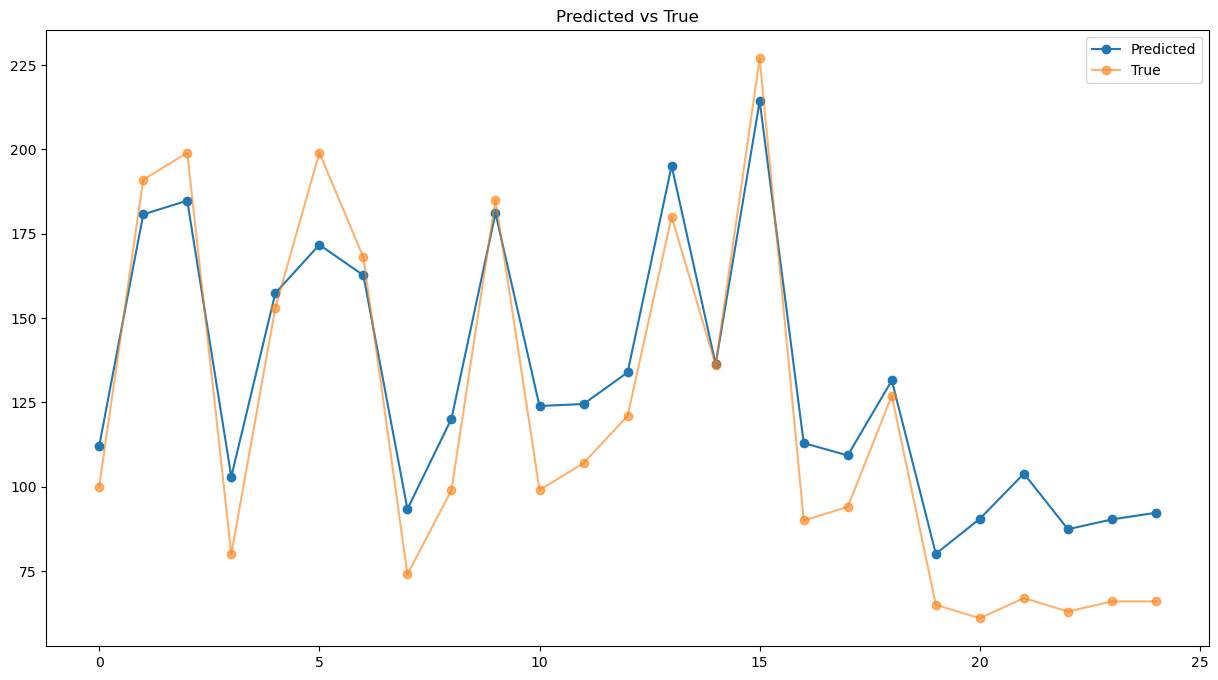

{'mae': 16.941993103027343,
 'mse': 19.19346405746787,
 'rmse': 368.38906252531103}

In [126]:
model_utils.plotPredicted(yhat_scaled,Y_scaled)
model_utils.forecast_accuracy(yhat_scaled,Y_scaled)

# Predicción del conjunto eventos del paciente 2

In [74]:
with open('dataset/generado/paciente2/eventos_X.npy', 'rb') as f:
    X = np.load(f) 

In [75]:
with open('dataset/generado/paciente2/eventos_Y.npy', 'rb') as f:
    Y = np.load(f) 

In [77]:
len(X)

25

In [78]:
len(Y)

25

In [87]:
df_Y = pd.DataFrame(Y, columns=['Glucose level True'])

Y_scaled=scalerGlucosa.inverse_transform(Y)
df_Y_scaled = pd.DataFrame(Y_scaled, columns=['Glucose level True']) 

In [94]:
yhat = model.predict(X)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_Y['Glucose level True']
df_glucose.head()

1/1 [==============================] - 0s 30ms/step


,Glucose level Predict,Glucose level True
0,0.156671,0.130435
1,0.305936,0.328261
2,0.314760,0.345652
3,0.136843,0.086957
4,0.255173,0.245652


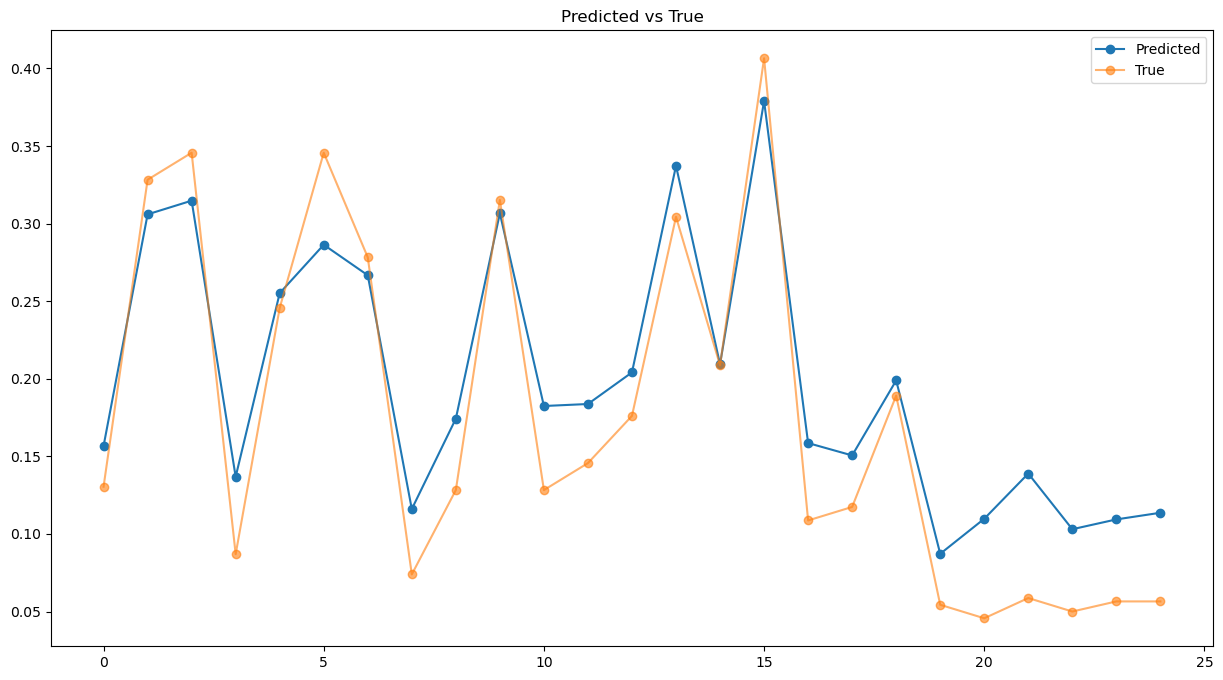

{'mae': 0.03683042363498521,
 'mse': 0.04172492492152485,
 'rmse': 0.0017409693597068856}

In [84]:
model_utils.plotPredicted(yhat,Y)
model_utils.forecast_accuracy(yhat,Y)

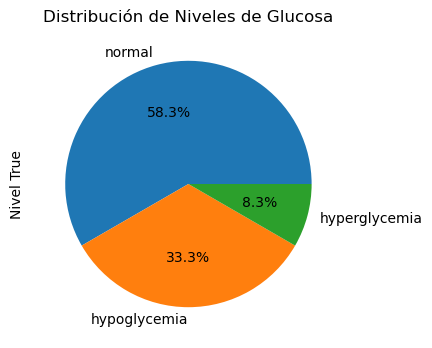

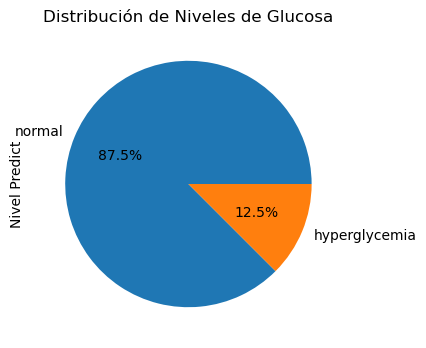

,Glucose level Predict,Nivel Predict,Glucose level True,Nivel True
0,79.632172,normal,54.0,hypoglycemia
1,127.137421,normal,116.0,normal
2,133.707474,normal,136.0,normal
3,79.575157,normal,53.0,hypoglycemia
4,146.067581,normal,143.0,normal


In [116]:
yhat_scaled=scalerGlucosa.inverse_transform(yhat)
df_glucose['Nivel Predict'] = df_glucose['Glucose level Predict'].apply(utils.label_LevelBG) 

df_glucose['Glucose level True']=df_Y_scaled['Glucose level True']
df_glucose['Nivel True'] = df_Y_scaled['Glucose level True'].apply(utils.label_LevelBG) 
df_glucose['Nivel True'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose['Nivel Predict'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose.head()



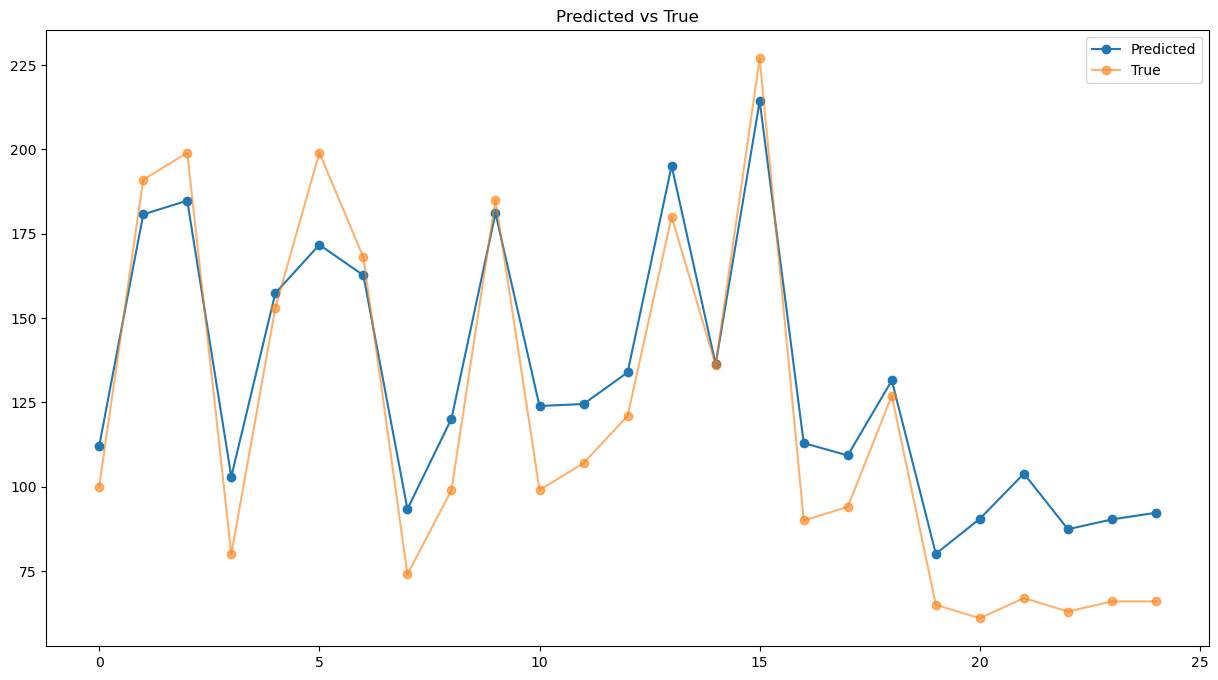

{'mae': 16.941993103027343,
 'mse': 19.19346405746787,
 'rmse': 368.38906252531103}

In [97]:
model_utils.plotPredicted(yhat_scaled,Y_scaled)
model_utils.forecast_accuracy(yhat_scaled,Y_scaled)

# Predicción del conjunto eventos del paciente 3

In [98]:
with open('dataset/generado/paciente3/eventos_X.npy', 'rb') as f:
    X = np.load(f) 

In [99]:
with open('dataset/generado/paciente3/eventos_Y.npy', 'rb') as f:
    Y = np.load(f) 

In [100]:
len(X)

24

In [101]:
len(Y)

24

In [113]:
df_Y = pd.DataFrame(Y, columns=['Glucose level True'])

Y_scaled=scalerGlucosa.inverse_transform(Y)
df_Y_scaled = pd.DataFrame(Y_scaled, columns=['Glucose level True'])

In [112]:
yhat = model.predict(X)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_Y['Glucose level True']
df_glucose.head()

1/1 [==============================] - 0s 35ms/step


,Glucose level Predict,Glucose level True
0,0.086157,0.030435
1,0.189429,0.165217
2,0.203712,0.208696
3,0.086033,0.028261
4,0.230582,0.223913


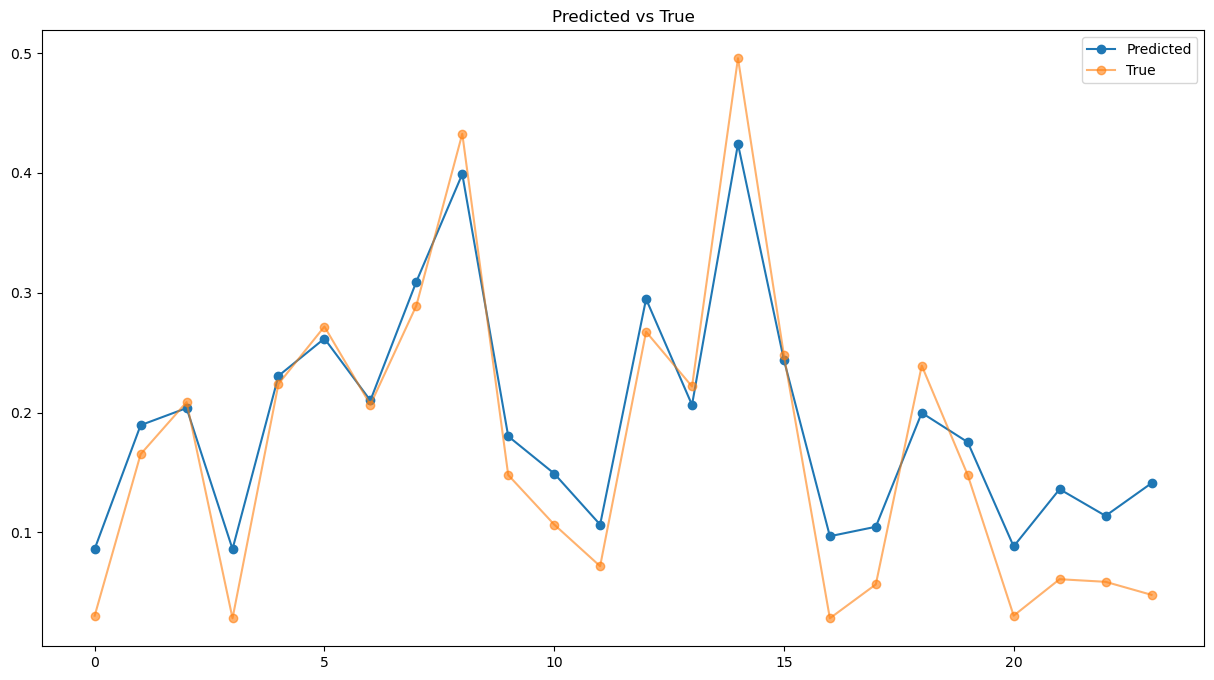

{'mae': 0.037879913176099456,
 'mse': 0.04515984485753908,
 'rmse': 0.002039411587556999}

In [104]:
model_utils.plotPredicted(yhat,Y)
model_utils.forecast_accuracy(yhat,Y)

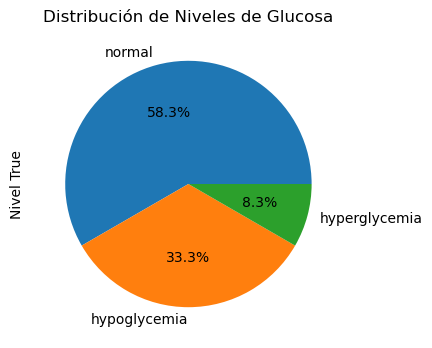

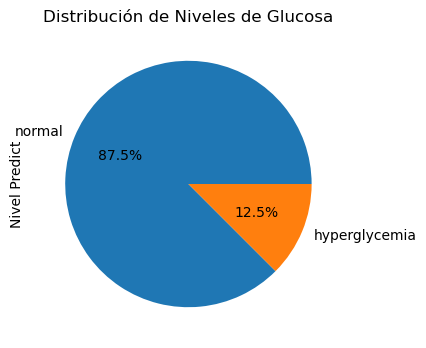

,Glucose level Predict,Nivel Predict,Glucose level True,Nivel True
0,79.632172,normal,54.0,hypoglycemia
1,127.137421,normal,116.0,normal
2,133.707474,normal,136.0,normal
3,79.575157,normal,53.0,hypoglycemia
4,146.067581,normal,143.0,normal


In [115]:
yhat_scaled=scalerGlucosa.inverse_transform(yhat)
df_glucose = pd.DataFrame(yhat_scaled, columns=['Glucose level Predict'])
df_glucose['Nivel Predict'] = df_glucose['Glucose level Predict'].apply(utils.label_LevelBG) 

df_glucose['Glucose level True']=df_Y_scaled['Glucose level True']
df_glucose['Nivel True'] = df_Y_scaled['Glucose level True'].apply(utils.label_LevelBG) 
df_glucose['Nivel True'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose['Nivel Predict'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose.head()



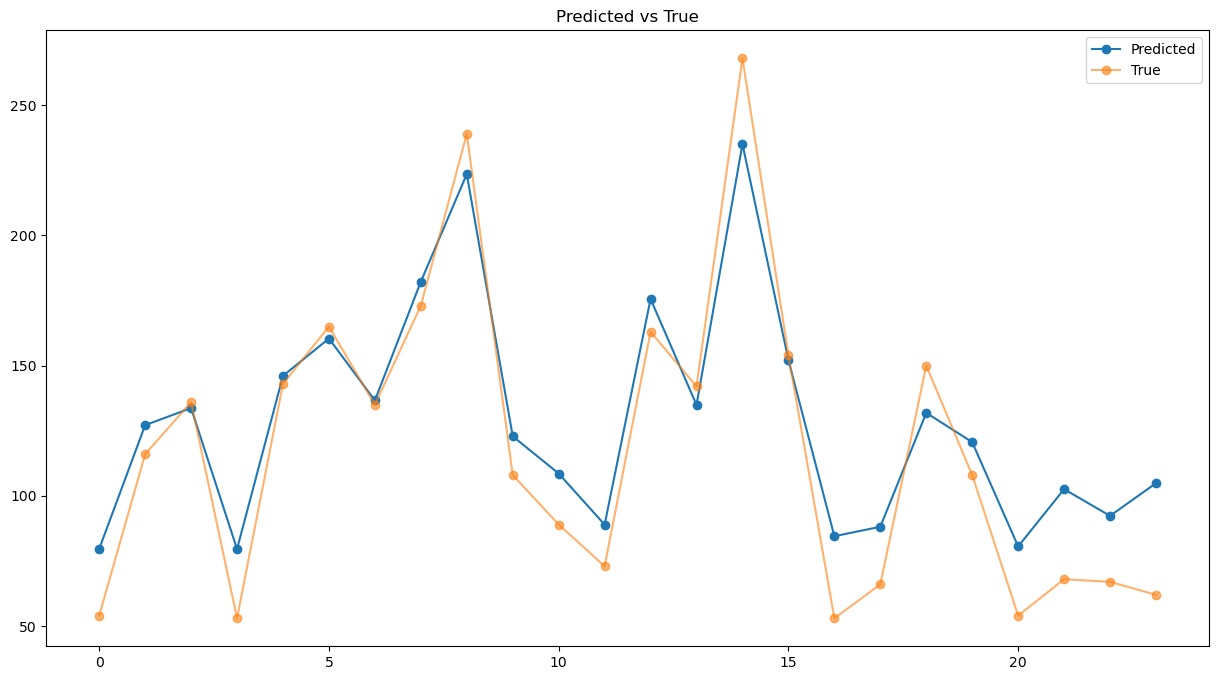

{'mae': 17.424758911132812,
 'mse': 20.773526667728976,
 'rmse': 431.5394102148469}

In [106]:
model_utils.plotPredicted(yhat_scaled,Y_scaled)
model_utils.forecast_accuracy(yhat_scaled,Y_scaled)

In [ ]:

dfPaciente['Nivel'] = dfPaciente['Glucose level'].apply(utils.label_LevelBG) 
dfPaciente['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa del Paciente ID: '+ID_Paciente +' del '+dateObj,y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()